In [140]:
import pandas as pd
import numpy as np
from typing import Optional
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
read_data = pd.read_excel("0922_PPIseqdata_reads.xlsx", index_col=0)
editfrac_data = pd.read_excel("0922_PPIseqdata_editfrac.xlsx", index_col=0)
editfrac50_data = pd.read_excel("0922_PPIseqdata_editfrac_over50.xlsx", index_col=0)
data_labels = pd.read_excel("0922_PPIseqdata_labels.xlsx", index_col=0)
ABE_tags = pd.read_excel("ABE_tags.xlsx", index_col=0).to_dict()["Description"]

In [155]:


def average_replicates(data: pd.DataFrame, data_terms: int = 1) -> pd.DataFrame:
    '''
    data_terms: number of elements in column names to average over
    '''
    #remove duplicates, preserve order
    tags = list(dict.fromkeys([" ".join(col.split()[:data_terms]) for col in data]))

    avg_data = pd.DataFrame(index=data.index)
    for tag in tags:
        avg_data[f"{tag} avg"] = data[[col for col in data if col.startswith(tag)]].mean(axis=1)

    return avg_data

# average_replicates(read_data, 2)

In [125]:
def get_max_tag(data: pd.DataFrame, time: str, desc: dict, labels: Optional[pd.DataFrame] = None, avg: bool = False) -> pd.DataFrame:
    if avg:
        data = average_replicates(data, data_terms=2)

    data = data[[col for col in data if time in col]]
    data_max = pd.DataFrame(data.idxmax(axis=1), columns=["Tag"])
    data_max["Tag"] = data_max["Tag"].apply(lambda cell: desc[cell.split()[0][4:]])
    if labels is not None:
        return data_max.join(labels)
    return data_max

In [129]:
read_max_1h = get_max_tag(data=read_data, time="1h", desc=ABE_tags)
read_max_3h = get_max_tag(data=read_data, time="3h", desc=ABE_tags)
read_max_1h_avg= get_max_tag(data=read_data, time="1h", desc=ABE_tags, avg=True)
read_max_3h_avg= get_max_tag(data=read_data, time="3h", desc=ABE_tags, avg=True)

editfrac_max_1h = get_max_tag(data=editfrac_data, time="1h", desc=ABE_tags)
editfrac_max_3h = get_max_tag(data=editfrac_data, time="3h", desc=ABE_tags)
editfrac_max_1h_avg= get_max_tag(data=editfrac_data, time="1h", desc=ABE_tags, avg=True)
editfrac_max_3h_avg= get_max_tag(data=editfrac_data, time="3h", desc=ABE_tags, avg=True)

editfrac50_max_1h = get_max_tag(data=editfrac50_data, time="1h", desc=ABE_tags)
editfrac50_max_3h = get_max_tag(data=editfrac50_data, time="3h", desc=ABE_tags)
editfrac50_max_1h_avg= get_max_tag(data=editfrac50_data, time="1h", desc=ABE_tags, avg=True)
editfrac50_max_3h_avg= get_max_tag(data=editfrac50_data, time="3h", desc=ABE_tags, avg=True)

all_maxes = pd.concat([read_max_1h, read_max_3h, read_max_1h_avg, read_max_3h_avg,
                    editfrac_max_1h, editfrac_max_1h_avg, editfrac_max_3h, editfrac_max_3h_avg,
                    editfrac50_max_1h, editfrac50_max_1h_avg, editfrac50_max_3h, editfrac50_max_3h_avg], axis=1)
all_maxes.columns = ["read_1h", "read_3h", "read_1h_avg", "read_3h_avg",
                    "editfrac_1h", "editfrac_1h_avg", "editfrac_3h", "editfrac_3h_avg",
                    "editfrac50_1h", "editfrac50_1h_avg", "editfrac50_3h", "editfrac50_3h_avg"]  # type: ignore


In [157]:
all_maxes_desc = all_maxes.join(data_labels)

In [119]:
print(len(read_max_1h[read_max_1h["Tag"] != read_max_1h_avg["Tag"]]))
print(len(editfrac_max_1h[editfrac_max_1h["Tag"] != editfrac_max_1h_avg["Tag"]]))
print(len(editfrac50_max_1h[editfrac50_max_1h["Tag"] != editfrac50_max_1h_avg["Tag"]]))

print(len(read_max_3h[read_max_3h["Tag"] != read_max_3h_avg["Tag"]]))
print(len(editfrac_max_3h[editfrac_max_3h["Tag"] != editfrac_max_3h_avg["Tag"]]))
print(len(editfrac50_max_3h[editfrac50_max_3h["Tag"] != editfrac50_max_3h_avg["Tag"]]))

132
106
106
101
32
30


In [89]:
print(len(editfrac50_max[editfrac50_max["Tag"] != editfrac_max["Tag"]]))
#editfrac_max and editfrac50_max only differ at 9 tags
all_max = pd.DataFrame({"read_max":read_max["Tag"], "editfrac50_max":editfrac50_max["Tag"]}, index = read_data.index).join(data_labels)
all_max_avg = pd.DataFrame({"read_max_avg":read_max["Tag"], "editfrac50_max_avg":editfrac50_max["Tag"]}, index = read_data.index).join(data_labels)

9


(array([ 16.,   0.,  97.,   0., 139.,   0.,  89.,   0.,  19.,   4.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <BarContainer object of 10 artists>)

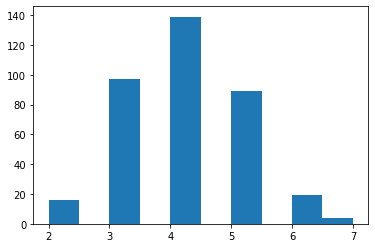

In [136]:
plt.hist(all_maxes.nunique(axis=1))

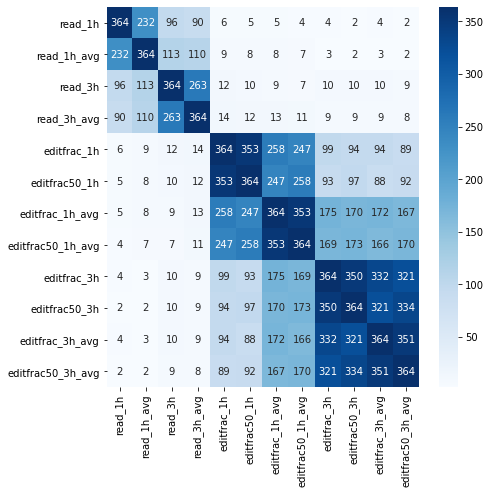

In [183]:
# column_order = ["read_1h", "read_3h", "read_1h_avg", "read_3h_avg",
#                 "editfrac_1h", "editfrac_1h_avg", "editfrac_3h", "editfrac_3h_avg",
#                 "editfrac50_1h", "editfrac50_1h_avg", "editfrac50_3h", "editfrac50_3h_avg"]

# column_order = ["read_1h", "editfrac_1h", "editfrac50_1h", "read_1h_avg",
#                 "editfrac_1h_avg","editfrac50_1h_avg","read_3h","read_3h_avg",
#                 "editfrac_3h", "editfrac_3h_avg", "editfrac50_3h", "editfrac50_3h_avg"]

column_order = ["read_1h", "read_1h_avg", "read_3h", "read_3h_avg",
                "editfrac_1h","editfrac50_1h", "editfrac_1h_avg", "editfrac50_1h_avg",
                "editfrac_3h","editfrac50_3h", "editfrac_3h_avg", "editfrac50_3h_avg"]

uniques = np.empty(shape = (12,12))
for x in range(12):
    for y in range(12):
        uniques[x,y] = int(len(all_maxes[all_maxes[column_order[x]] == all_maxes[column_order[y]]]))

mask = np.zeros_like(uniques)
# mask[np.triu_indices_from(mask,1)] = True
plt.figure(figsize=(7,7))
sns.heatmap(uniques, annot=True, fmt='g', xticklabels=column_order, yticklabels=column_order, cmap="Blues", mask=mask);  # type: ignore

,read_1h,read_3h,read_1h_avg,read_3h_avg,editfrac_1h,editfrac_1h_avg,editfrac_3h,editfrac_3h_avg,editfrac50_1h,editfrac50_1h_avg,editfrac50_3h,editfrac50_3h_avg
Golgi,1,5,1,6,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN
TARDBP (TDP43) N-terminus,2,4,3,1,3.0,NaN,10.0,12.0,3.0,NaN,11.0,13.0
actin,47,4,13,3,12.0,8.0,4.0,2.0,9.0,5.0,2.0,1.0
autophagy,10,30,11,30,91.0,57.0,15.0,15.0,91.0,57.0,18.0,17.0
chaperone mediated autophagy,138,43,138,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
endoplasmic reticulum outer membrane,2,12,2,12,18.0,11.0,7.0,5.0,19.0,12.0,7.0,5.0
lipid droplet,31,18,15,12,5.0,3.0,6.0,7.0,4.0,2.0,5.0,6.0
nuclear export sequence,1,6,1,7,95.0,180.0,285.0,292.0,89.0,174.0,275.0,282.0
nuclear lamin,9,12,8,9,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
nuclear localization sequence,30,105,102,125,3.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0


<AxesSubplot:>

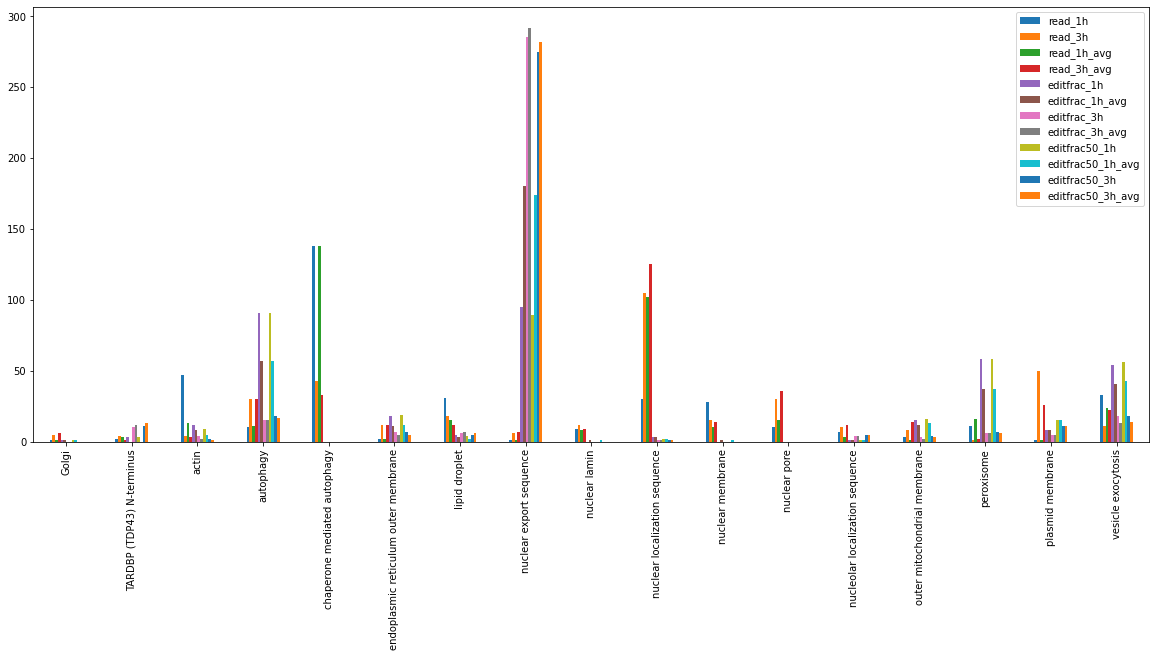

In [178]:
# sns.histplot(all_maxes)
# plt.figure(figsize=(20,8))
# sns.countplot(data=all_maxes.apply(pd.value_counts),hue="Gene")
display(all_maxes.apply(pd.value_counts))
all_maxes.apply(pd.value_counts).plot(kind='bar',figsize=(20,8))
